https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need to show total amount of sales per year

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [5]:
%run jsoncleaner.py

In [6]:
#DO NOT RUN THIS TWICE IT CONTAINS A MERGE
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df['PPS']=df['Sale Price']/df['Square Footage Improved']
df.PPS=df.PPS.replace(np.inf, np.nan)
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alehe\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
start, end = '2015-01-01', '2019-06'
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()

In [8]:
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
idf = pd.DataFrame(df[['Sale Price', 'Sale Date', 'Zone']])
monthly = idf.resample('M').mean()
monthly.head()

,Sale Price,Zone
Most Recent Sale Date,,
1997-06-30,171900.0,2.0
1997-07-31,NaN,NaN
1997-08-31,NaN,NaN
1997-09-30,NaN,NaN
1997-10-31,NaN,NaN


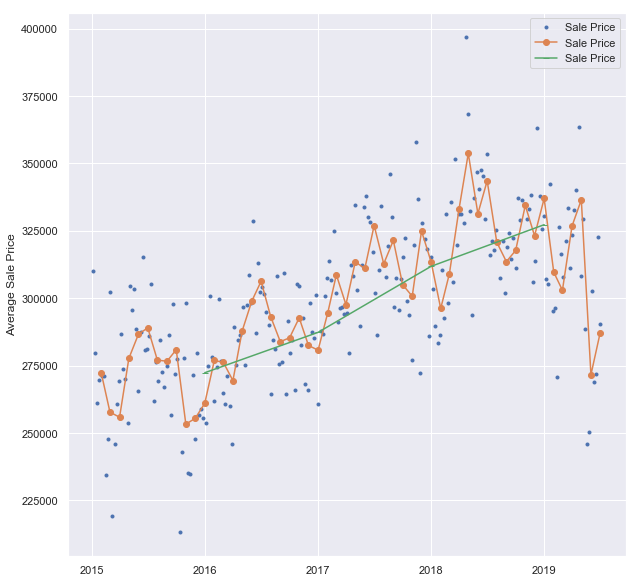

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[start:end],marker='.',linestyle='None')
ax.plot(monthlymean.loc[start:end], marker='o')
ax.plot(yearlymean.loc[start:end], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
#Notice the uptick during summer

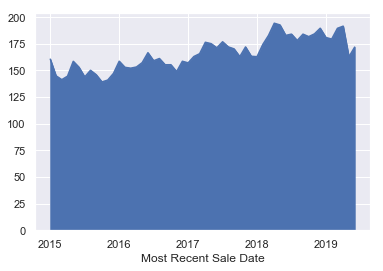

In [14]:
monthlypps= df['PPS'].resample('M').mean()

monthlypps.loc[start:end].plot.area()

ValueError: need at least one array to concatenate

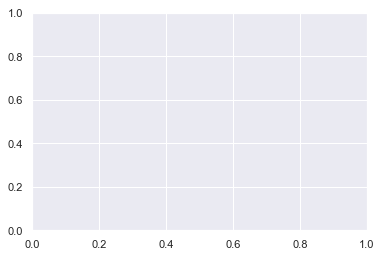

In [15]:
#Want a stacked/area graph of sales by Zone and by Housing Type
#sns.lineplot(x=month, y = monthlypps, hue = 'Zone', data = df)

In [58]:
df['PPS'] = df['Sale Price'] / df['Square Footage Improved']
df['PPS'] = df['PPS'].replace(np.inf, np.nan)

In [106]:
monthlypps = df.PPS.resample('M').mean()

monthlypps.loc[start:end].head()

Most Recent Sale Date
2015-01-31    160.609451
2015-02-28    144.987879
2015-03-31    141.378106
2015-04-30    144.643852
2015-05-31    158.591463
Freq: M, Name: PPS, dtype: float64

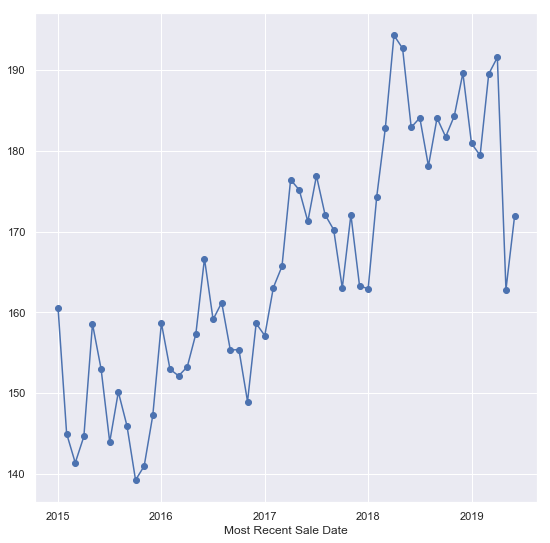

In [110]:
plt.figure(figsize=(9,9))
monthlypps.loc[start:end].plot(marker='o')

In [10]:
sns.lineplot(x=df['Sale Date'].dt.month, y = df['PPS'].mean(), data=df.resample('M'))

AttributeError: 'DatetimeIndexResampler' object has no attribute 'get'

In [42]:
df['Sale Date']= pd.to_datetime(df['Sale Date'])

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df=df.set_index('Most Recent Sale Date')

KeyError: 'Most Recent Sale Date'

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


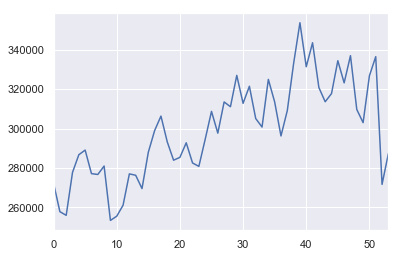

In [68]:
sns.tsplot(df['Sale Price'].loc[start:end].resample('M').mean())